<a href="https://colab.research.google.com/github/pierrot73/GenAIBootCamp/blob/main/Hackathon_%20Attrition%20and%20Performance_Structure_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Hackathon Sujet 3 – Analyse de l'Attrition de la société IBM


## Plan du notebook

1. Importation des données
2. Analyse exploratoire (EDA)
3. Prétraitement des données
4. Analyse des corrélations et des tendances
5. Visualisations avancées
6. Recommandations RH
7. (Bonus) Modèle prédictif


## 1. Importation des bibliothèques et des données

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de l'apparence des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Chargement des données

from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Datasets/IBM_DataSet.csv'
df = pd.read_csv(file_path)

df.head()



Mounted at /content/drive


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 🔍 2. Analyse exploratoire des données (EDA)

### 2.1 – Aperçu général des données

In [ ]:
# Afficher les dimensions du dataset
print("Dimensions du dataset :", df.shape)

Dimensions du dataset : (1470, 35)


In [ ]:
# Aperçu des types de données et des valeurs nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Statistiques descriptives sur les variables numériques
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Le dataset contient 1 470 employés et 35 colonnes.
    #Il n'y a pas de colonnes avec des valeurs manquantes.
    #L'âge moyen des employés est de 37 ans, le revenu mensuel moyen est de 6 500$.
    #La variable Attrition (notre cible) est de type object car elle contient les mots Yes ou No.

### 2.2 Taux Golbal d'attrition


/tmp/ipython-input-8-883604470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="Set2")


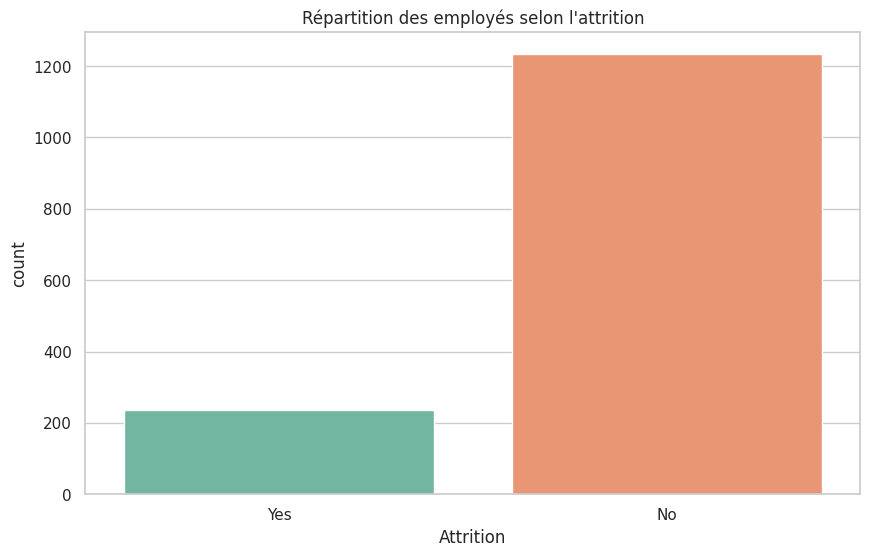

In [ ]:
# Affichage de la variable cible (Attrition)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Attrition", palette="Set2")
plt.title("Répartition des employés selon l'attrition")
plt.show()


In [ ]:
# Pourcentage d'employés ayant quitté l'entreprise
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
print("Taux d'attrition (%):")
print(attrition_rate)


Taux d'attrition (%):
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [ ]:
# Environ 16 % des employés ont quitté l’entreprise.
# Ce chiffre est non négligeable et justifie de mener une analyse pour en comprendre les causes.

### 2.3 – Attrition en fonction de l’âge

/tmp/ipython-input-10-48399103.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="Age", palette="coolwarm")


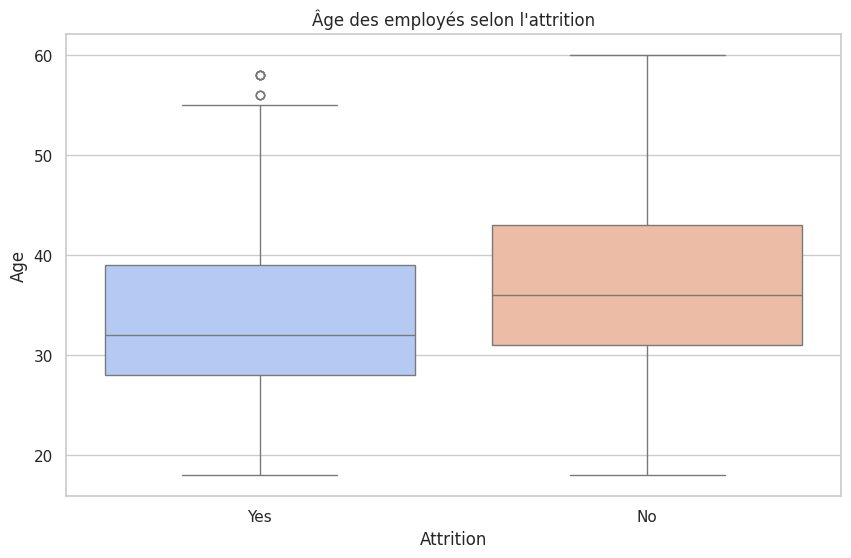

In [ ]:
sns.boxplot(data=df, x="Attrition", y="Age", palette="coolwarm")
plt.title("Âge des employés selon l'attrition")
plt.show()


In [ ]:
# Interprétation du graphique :
#Le taux d’attrition est plus élevé chez les jeunes employés. Un programme de fidélisation pour les moins de 30 ans pourrait être envisagé (formation, évolution rapide, mentorat).

### 2.4 Attrition par genre

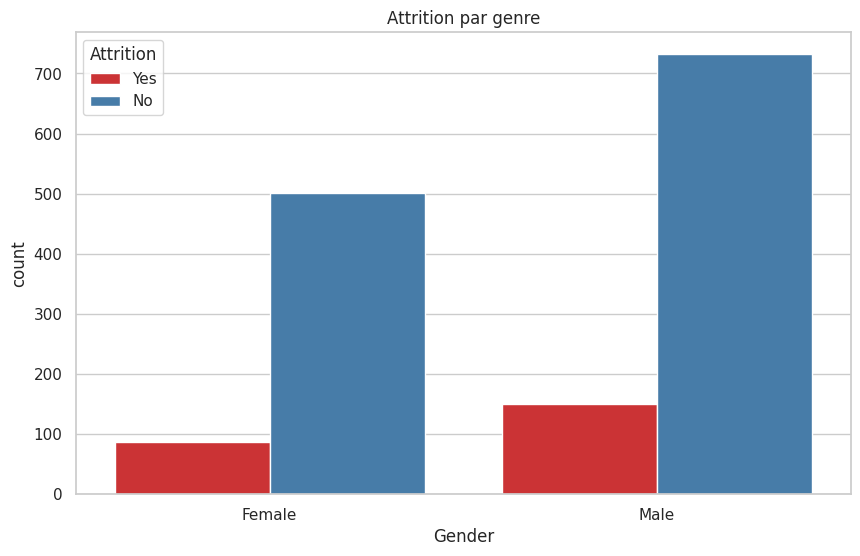

In [ ]:
sns.countplot(data=df, x="Gender", hue="Attrition", palette="Set1")
plt.title("Attrition par genre")
plt.show()


In [ ]:
# Calculer le pourcentage d'attrition par genre
genre_attrition = pd.crosstab(df["Gender"], df["Attrition"], normalize='index') * 100

# Arrondir à 2 décimales
genre_attrition = genre_attrition.round(2)

# Afficher les résultats
print("Taux d'attrition par genre (%):")
print(genre_attrition)


Taux d'attrition par genre (%):
Attrition     No    Yes
Gender                 
Female     85.20  14.80
Male       82.99  17.01


In [ ]:
# Interprétation :
    #Le taux d'attrition est légèrement plus élevé chez les hommes (17 %) que chez les femmes (14,8 %).
    #La différence n'est pas très marquée, mais elle existe.

### 2.5 Attrition par niveau d'éducation

Taux d’attrition selon le niveau d’éducation :
Attrition           No    Yes
Education_Label              
Bachelor         82.69  17.31
Below College    81.76  18.24
College          84.40  15.60
Doctor           89.58  10.42
Master           85.43  14.57


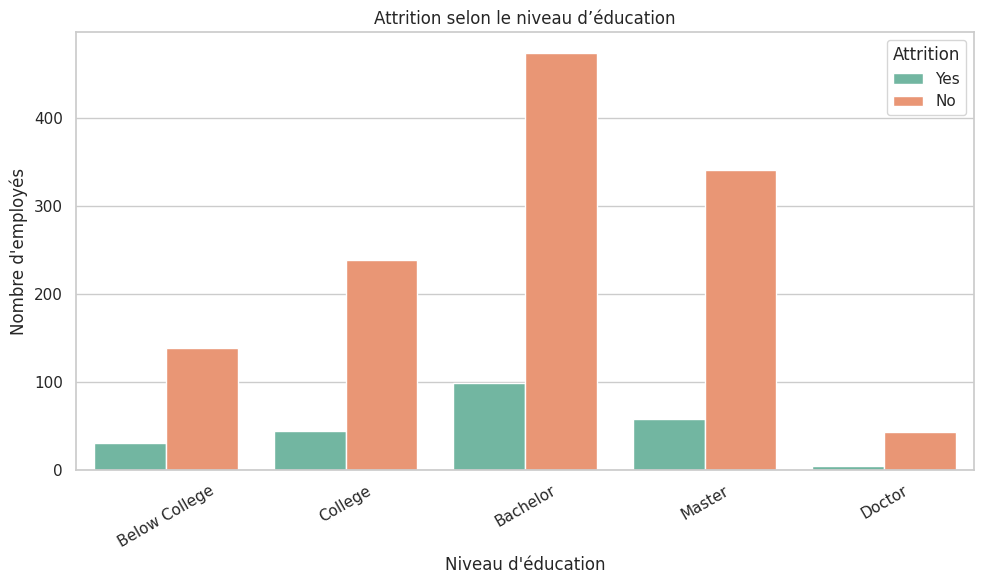

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping des niveaux d’éducation
education_map = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}
df["Education_Label"] = df["Education"].map(education_map)

# Tableau de fréquence avec pourcentages
education_attrition = pd.crosstab(df["Education_Label"], df["Attrition"], normalize='index') * 100
education_attrition = education_attrition.round(2)

# Affichage du tableau
print("Taux d’attrition selon le niveau d’éducation :")
print(education_attrition)

# Visualisation
sns.countplot(data=df, x="Education_Label", hue="Attrition", palette="Set2", order=["Below College", "College", "Bachelor", "Master", "Doctor"])
plt.title("Attrition selon le niveau d’éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre d'employés")
plt.xticks(rotation=30)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()



In [ ]:
# Tendance observée:

    #Les employés avec un niveau d'éducation faible (Below College, College) présentent un taux d’attrition plus faible.

    #Le taux d’attrition augmente à partir du niveau Bachelor.

    #Ce sont les employés Bachelor, Master qui ont les taux d’attrition les plus élevés.'''

### 2.6 Attrition par fonction

In [ ]:
# Création du tableau de fréquence avec pourcentages
jobrole_attrition = pd.crosstab(df["JobRole"], df["Attrition"], normalize='index') * 100
jobrole_attrition = jobrole_attrition.round(2)

# Affichage du tableau
print("Taux d’attrition selon la fonction (JobRole) :")
print(jobrole_attrition)

# Visualisation
sns.countplot(data=df, x="JobRole", hue="Attrition", palette="Set2")
plt.title("Attrition selon la fonction (JobRole)")
plt.xlabel("Fonction")
plt.ylabel("Nombre d’employés")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [ ]:
# les Laboratory Technicians ou Sales Representatives ont un taux d’attrition beaucoup plus élevé que les Managers ou Research Directors, cela indique certaines fonctions à risque.

### 2.7 Attrition par département



Taux d’attrition selon le département :
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63


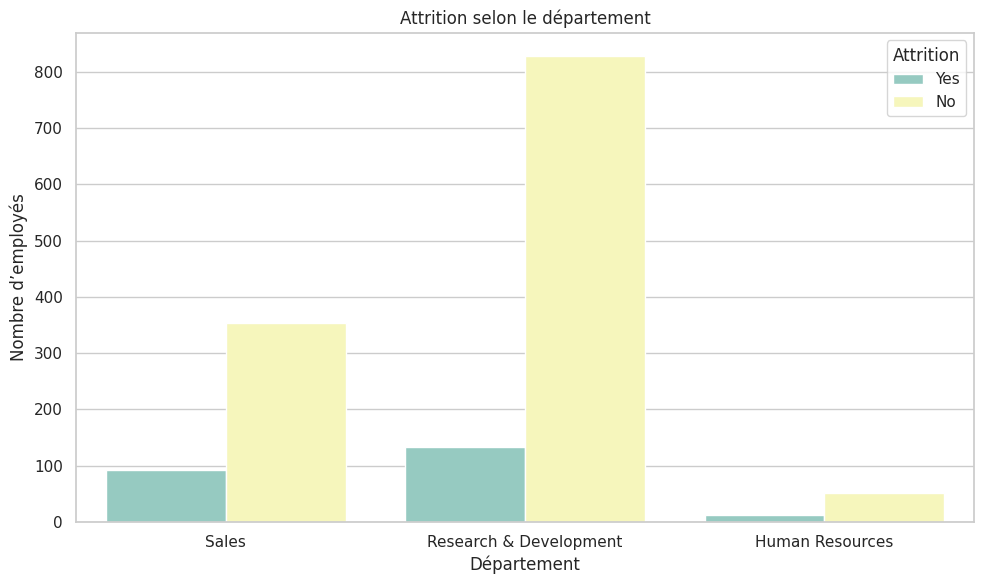

In [ ]:
# Création du tableau de fréquence avec pourcentages
department_attrition = pd.crosstab(df["Department"], df["Attrition"], normalize='index') * 100
department_attrition = department_attrition.round(2)

# Affichage du tableau
print("Taux d’attrition selon le département :")
print(department_attrition)

# Visualisation
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set3")
plt.title("Attrition selon le département")
plt.xlabel("Département")
plt.ylabel("Nombre d’employés")
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


In [ ]:

#  Département avec forte attrition :
      Par exemple, Sales ou Research & Development peuvent montrer une rotation plus élevée :

          - Forte pression sur les résultat ?
          - Objectifs élevés ou charge mentale importante ?
          - Moins d’opportunités internes perçues ?

#  Département avec faible attrition :
     Les ressources humaines sont plus stable

       Parfois avec une meilleure ambiance de travail ou un rythme plus équilibré.


### 2.8 Impact de la satisfaction


Taux d’attrition selon JobSatisfaction :
Attrition           No    Yes
JobSatisfaction              
1                77.16  22.84
2                83.57  16.43
3                83.48  16.52
4                88.67  11.33


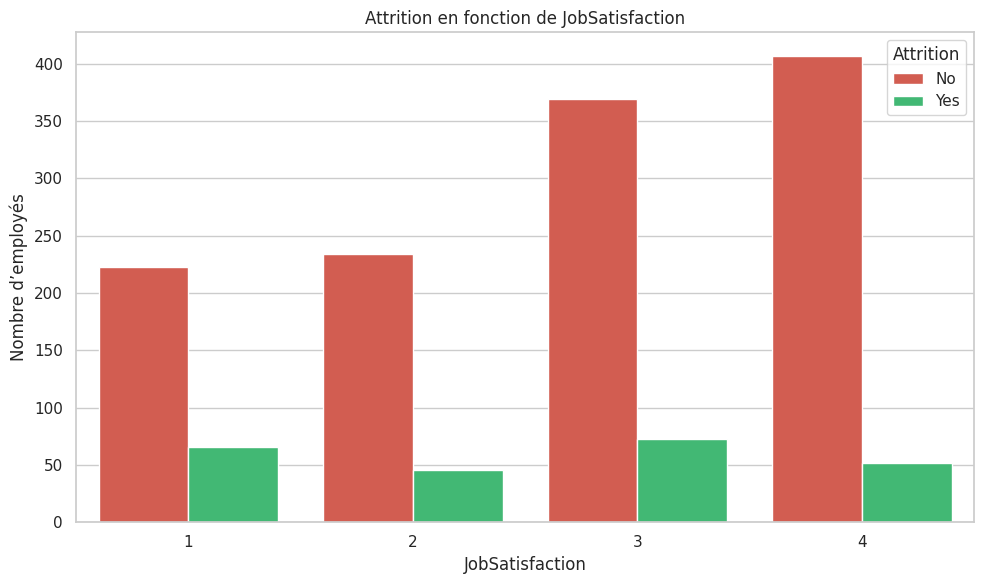


Taux d’attrition selon EnvironmentSatisfaction :
Attrition                   No    Yes
EnvironmentSatisfaction              
1                        74.65  25.35
2                        85.02  14.98
3                        86.31  13.69
4                        86.55  13.45


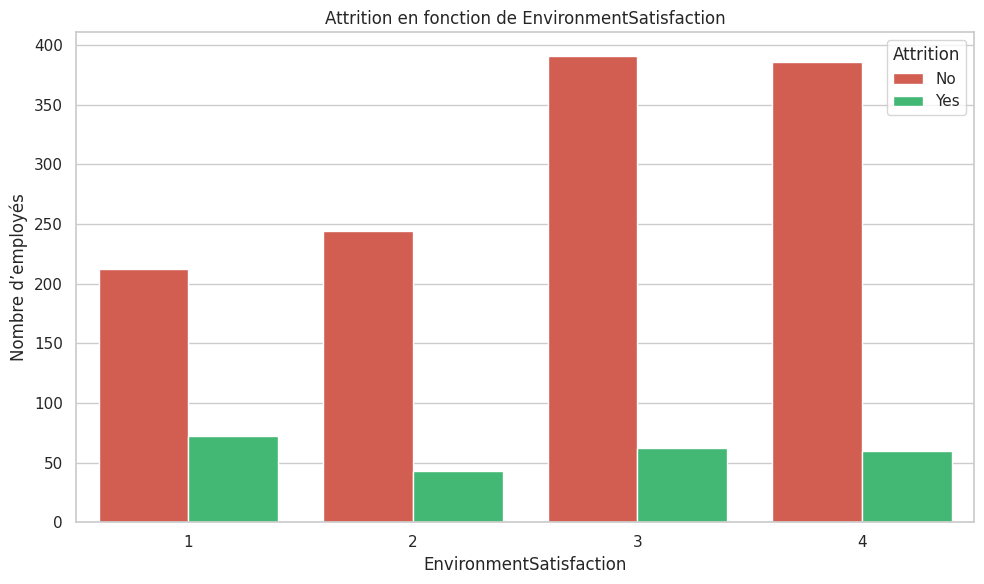


Taux d’attrition selon WorkLifeBalance :
Attrition           No    Yes
WorkLifeBalance              
1                68.75  31.25
2                83.14  16.86
3                85.78  14.22
4                82.35  17.65


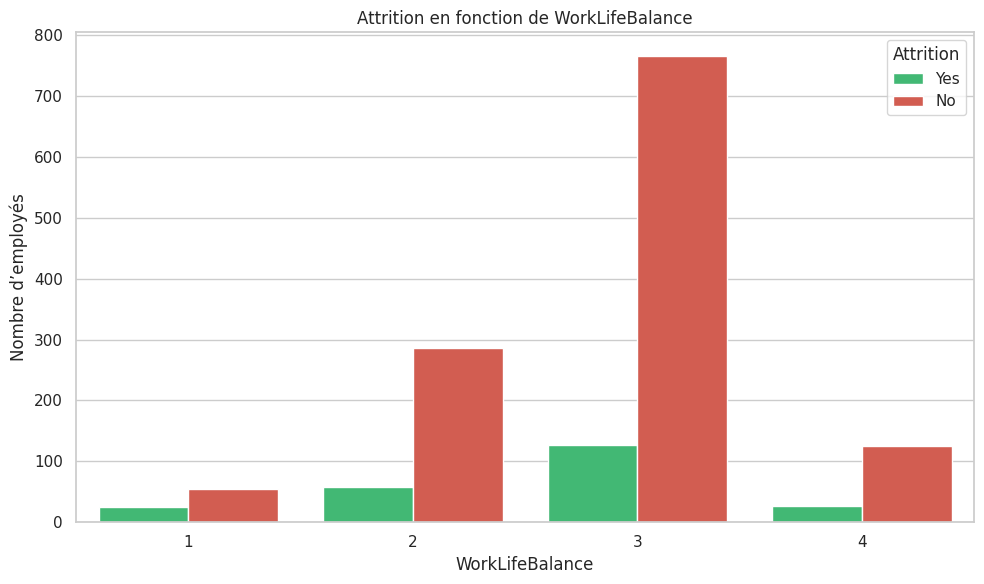

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Palette personnalisée : No = rouge, Yes = vert
custom_palette = {"No": "#e74c3c", "Yes": "#2ecc71"}

# Variables de satisfaction à analyser
satisfaction_vars = ["JobSatisfaction", "EnvironmentSatisfaction", "WorkLifeBalance"]

for var in satisfaction_vars:
    # Table de fréquence normalisée
    sat_attrition = pd.crosstab(df[var], df["Attrition"], normalize='index') * 100
    sat_attrition = sat_attrition.round(2)
    print(f"\nTaux d’attrition selon {var} :")
    print(sat_attrition)

    # Graphique
    sns.countplot(data=df, x=var, hue="Attrition", palette=custom_palette)
    plt.title(f"Attrition en fonction de {var}")
    plt.xlabel(var)
    plt.ylabel("Nombre d’employés")
    plt.legend(title="Attrition", loc="upper right")
    plt.tight_layout()
    plt.show()



In [ ]:
#Job Satisfaction (Satisfaction au travail)

    - Plus la satisfaction au travail est élevée, plus les employés restent dans l’entreprise.

    - Le taux d’attrition passe de 22.8 % (niveau 1) à 11.3 % (niveau 4).

 Cela confirme une corrélation négative entre satisfaction et attrition.


In [ ]:
# Satisfaction de l’environnement de travail)

    - Les employés moins satisfaits de leur environnement sont plus susceptibles de partir.

    - L’attrition diminue significativement après le niveau 1.

Encore une corrélation claire et négative.



In [ ]:


# Work-Life Balance (Équilibre vie pro/perso)

    - Le plus bas niveau de Work-Life Balance (niveau 1) est très fortement associé à un taux d’attrition élevé (31.3 %).

    - Ensuite, les niveaux 2 à 4 sont tous beaucoup plus bas (~15 %).

Une mauvaise conciliation travail/vie privée est donc un facteur d’attrition fort.



## 3. Prétraitement des données

### 3.1 Gestion des données manquantes

In [ ]:
df.isnull().sum()



,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


### 3.2 Encodage des variable catégorielles

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["JobRole", "MaritalStatus", "OverTime", "Attrition",
                    "BusinessTravel", "Department", "EducationField", "Gender"]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Voir si l'encodage a bien ete efectué
for col in categorical_cols:
    print(f"Encodage de {col} :")
    print(dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))))
    print()


Encodage de JobRole :
{'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2), 'Manager': np.int64(3), 'Manufacturing Director': np.int64(4), 'Research Director': np.int64(5), 'Research Scientist': np.int64(6), 'Sales Executive': np.int64(7), 'Sales Representative': np.int64(8)}

Encodage de MaritalStatus :
{'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}

Encodage de OverTime :
{'No': np.int64(0), 'Yes': np.int64(1)}

Encodage de Attrition :
{'No': np.int64(0), 'Yes': np.int64(1)}

Encodage de BusinessTravel :
{'Non-Travel': np.int64(0), 'Travel_Frequently': np.int64(1), 'Travel_Rarely': np.int64(2)}

Encodage de Department :
{'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}

Encodage de EducationField :
{'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int

### 3.3 Normalisation des variables numériques

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ["MonthlyIncome", "Age", "DistanceFromHome"]

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


print("Aperçu des données normalisées (moyenne ~0, écart-type ~1) :")
print(df[["MonthlyIncome", "Age", "DistanceFromHome"]].describe())



Aperçu des données normalisées (moyenne ~0, écart-type ~1) :
       MonthlyIncome          Age  DistanceFromHome
count    1470.000000  1470.000000       1470.000000
mean        0.289307     0.450567          0.292590
std         0.247918     0.217509          0.289531
min         0.000000     0.000000          0.000000
25%         0.100158     0.285714          0.035714
50%         0.205898     0.428571          0.214286
75%         0.388099     0.595238          0.464286
max         1.000000     1.000000          1.000000


## 📊 4. Analyse des corrélations et tendances

### 4.1 Corrélations entre l’attrition et des variables RH

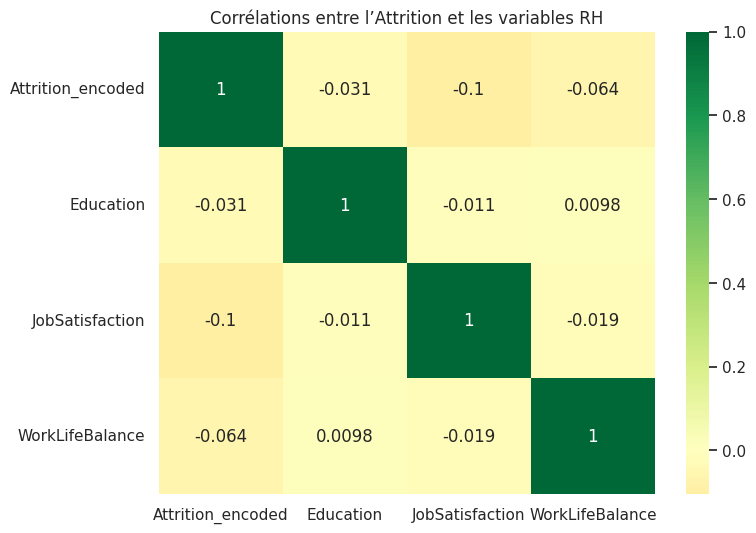

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Encodage binaire de la variable cible 'Attrition'
df['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 2. Sélection des variables pour l’analyse de corrélation
correlation_vars = ['Attrition_encoded', 'Education', 'JobSatisfaction', 'WorkLifeBalance']
correlation_matrix = df[correlation_vars].corr()

# 3. Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title("Corrélations entre l’Attrition et les variables RH")
plt.show()



In [ ]:
# Résultats de la heatmap:

    - Presque une matrice d identité mais ce n est pas le cas, il y a une legère correlation entre les variables

# Interprétation :

    JobSatisfaction	~ –0.10	➤ Plus un salarié est satisfait de son travail, moins il risque de partir.
         Corrélation faible, mais cohérente : la satisfaction agit comme un petit facteur protecteur.

    WorkLifeBalance	~ –0.06	➤ Plus l’équilibre vie perso / pro est bon, moins il y a d’attrition.
         Effet léger : ce n’est pas le facteur principal, mais il a un petit impact.

    Education	~ –0.03	➤ Le niveau d’étude a quasiment aucun lien avec le fait de partir ou rester.
         Ce n’est pas une variable utile pour prédire l’attrition.



### 4.2 Analyse des tendances de PerformanceRating par fonction (jobrole) et departement



In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# --- ANOVA sur JobRole ---
job_roles = df['JobRole'].unique()
anova_data_jobrole = [df[df['JobRole'] == role]['PerformanceRating'].dropna() for role in job_roles]
anova_result_jobrole = f_oneway(*anova_data_jobrole)

print("ANOVA - JobRole vs PerformanceRating")
print("F-statistic:", round(anova_result_jobrole.statistic, 2))
print("p-value:", round(anova_result_jobrole.pvalue, 2))
print()

# --- ANOVA sur Department ---
departments = df['Department'].unique()
anova_data_department = [df[df['Department'] == dept]['PerformanceRating'].dropna() for dept in departments]
anova_result_department = f_oneway(*anova_data_department)

print("ANOVA - Department vs PerformanceRating")
print("F-statistic:", round(anova_result_department.statistic, 2))
print("p-value:", round(anova_result_department.pvalue, 2))


ANOVA - JobRole vs PerformanceRating
F-statistic: 0.89
p-value: 0.53

ANOVA - Department vs PerformanceRating
F-statistic: 0.79
p-value: 0.45


In [ ]:
# p-value > 0.05 dans les deux cas →
# D’après les résultats du test ANOVA, les évaluations de performance (PerformanceRating) ne varient pas de manière significative selon les départements ou les postes.

### 4.3 Tableau croisé de la relation: Fonction x Distancefromhome x Attrition



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# --- Tableau croisé : DistanceFromHome par JobRole et Attrition ---
pivot_distance = pd.pivot_table(
    df,
    values='DistanceFromHome',
    index='JobRole',
    columns='Attrition',
    aggfunc='mean'
)

# Affichage du tableau croisé
print("Tableau croisé : Moyenne de DistanceFromHome par JobRole et Attrition")
print(pivot_distance)

Tableau croisé : Moyenne de DistanceFromHome par JobRole et Attrition
Attrition                        No        Yes
JobRole                                       
Healthcare Representative  9.204918  17.666667
Human Resources            6.600000  13.416667
Laboratory Technician      9.329949   9.661290
Manager                    7.927835  10.000000
Manufacturing Director     9.533333   8.800000
Research Director          8.474359   7.000000
Research Scientist         8.869388   9.765957
Sales Executive            9.026022  12.649123
Sales Representative       9.000000   8.151515


In [ ]:
# Conclusion :

Pour certains postes, une distance plus grande est clairement associée à un risque de départ plus élevé :

    Healthcare Rep. (+8.5 km)

    Human Resources (+6.8 km)

    Sales Executive (+3.6 km)

Pour d'autres postes, l'effet est neutre ou modéré : Managers, Researchers, Techniciens...


Quelques rôles montrent même une tendance inverse :
Research Director, Sales Representative → ceux qui partent habitent plus près.


### 4.4 Heatmap : Fonction x Distancefromhome x Attrition

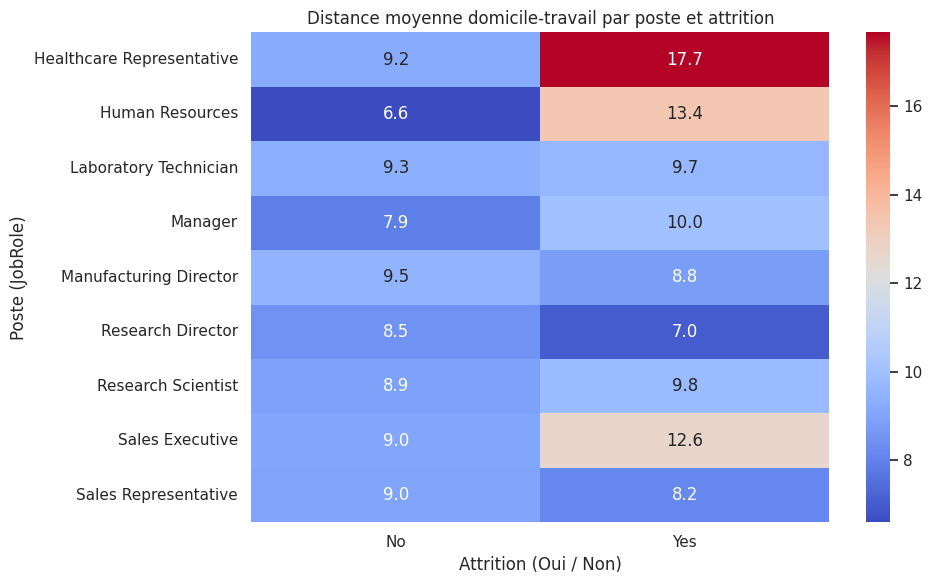

In [ ]:
# --- Heatmap pour visualiser les relations ---
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_distance, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Distance moyenne domicile-travail par poste et attrition")
plt.ylabel("Poste (JobRole)")
plt.xlabel("Attrition (Oui / Non)")
plt.tight_layout()
plt.show()

In [ ]:
Synthèse – Impact de la distance sur l’attrition par poste
L’analyse de la distance moyenne domicile-travail selon le poste et l’attrition révèle trois tendances :

Postes sensibles à la distance :
Healthcare Representative, Human Resources et Sales Executive
➤ Les salariés qui quittent ces postes habitent significativement plus loin que ceux qui restent.
→ La distance semble être un facteur d’attrition à prendre en compte.

Postes modérément impactés :
Managers, Techniciens, Research Scientists
➤ L’écart de distance est faible entre les deux groupes.
→ L’éloignement n’est pas un facteur déterminant.

Postes à tendance inverse :
Sales Representative, Research Director
➤ Ceux qui partent habitent parfois plus près que ceux qui restent.
→ L’attrition dépend probablement d’autres facteurs (pression, évolution, etc.).

### 4.5 Croisement MonthlyIncome × Education × Attrition

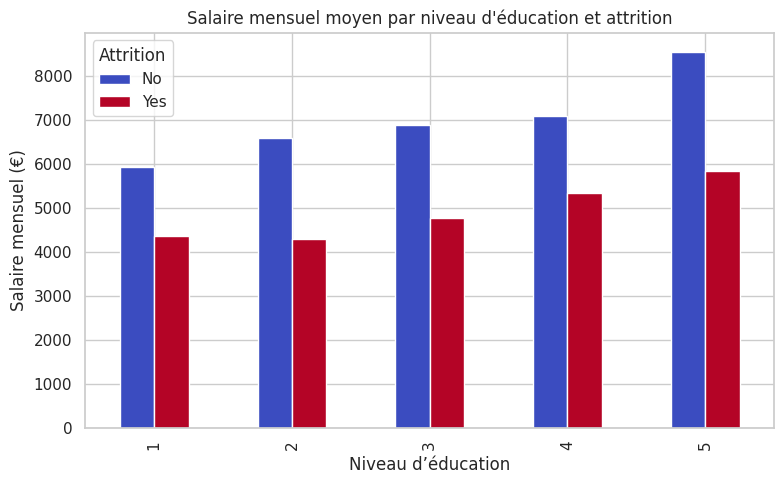

In [ ]:
# Représenter le revenu moyen par niveau d’éducation et attrition
pivot_income = df.pivot_table(values="MonthlyIncome", index="Education", columns="Attrition", aggfunc="mean")

# Visualisation
pivot_income.plot(kind='bar', figsize=(8, 5), colormap="coolwarm")
plt.title("Salaire mensuel moyen par niveau d'éducation et attrition")
plt.ylabel("Salaire mensuel (€)")
plt.xlabel("Niveau d’éducation")
plt.tight_layout()
plt.show()


In [ ]:
#Interprétation rapide :
    Plus le niveau d’éducation augmente, plus le salaire moyen est élevé, ce qui est attendu.

    Pour chaque niveau d’éducation, les salariés qui restent dans l’entreprise (Attrition = No) ont tendance à gagner un peu plus que ceux qui partent (Attrition = Yes).

    L’écart de salaire n’est pas énorme, mais il est régulier sur tous les niveaux.

#Hypothèse possible :
    Les salariés moins bien rémunérés au sein d’un même niveau d’éducation peuvent se sentir moins reconnus ou moins valorisés, ce qui peut favoriser leur départ.


## 5. Visualisations avancées

### Heatmap Globale

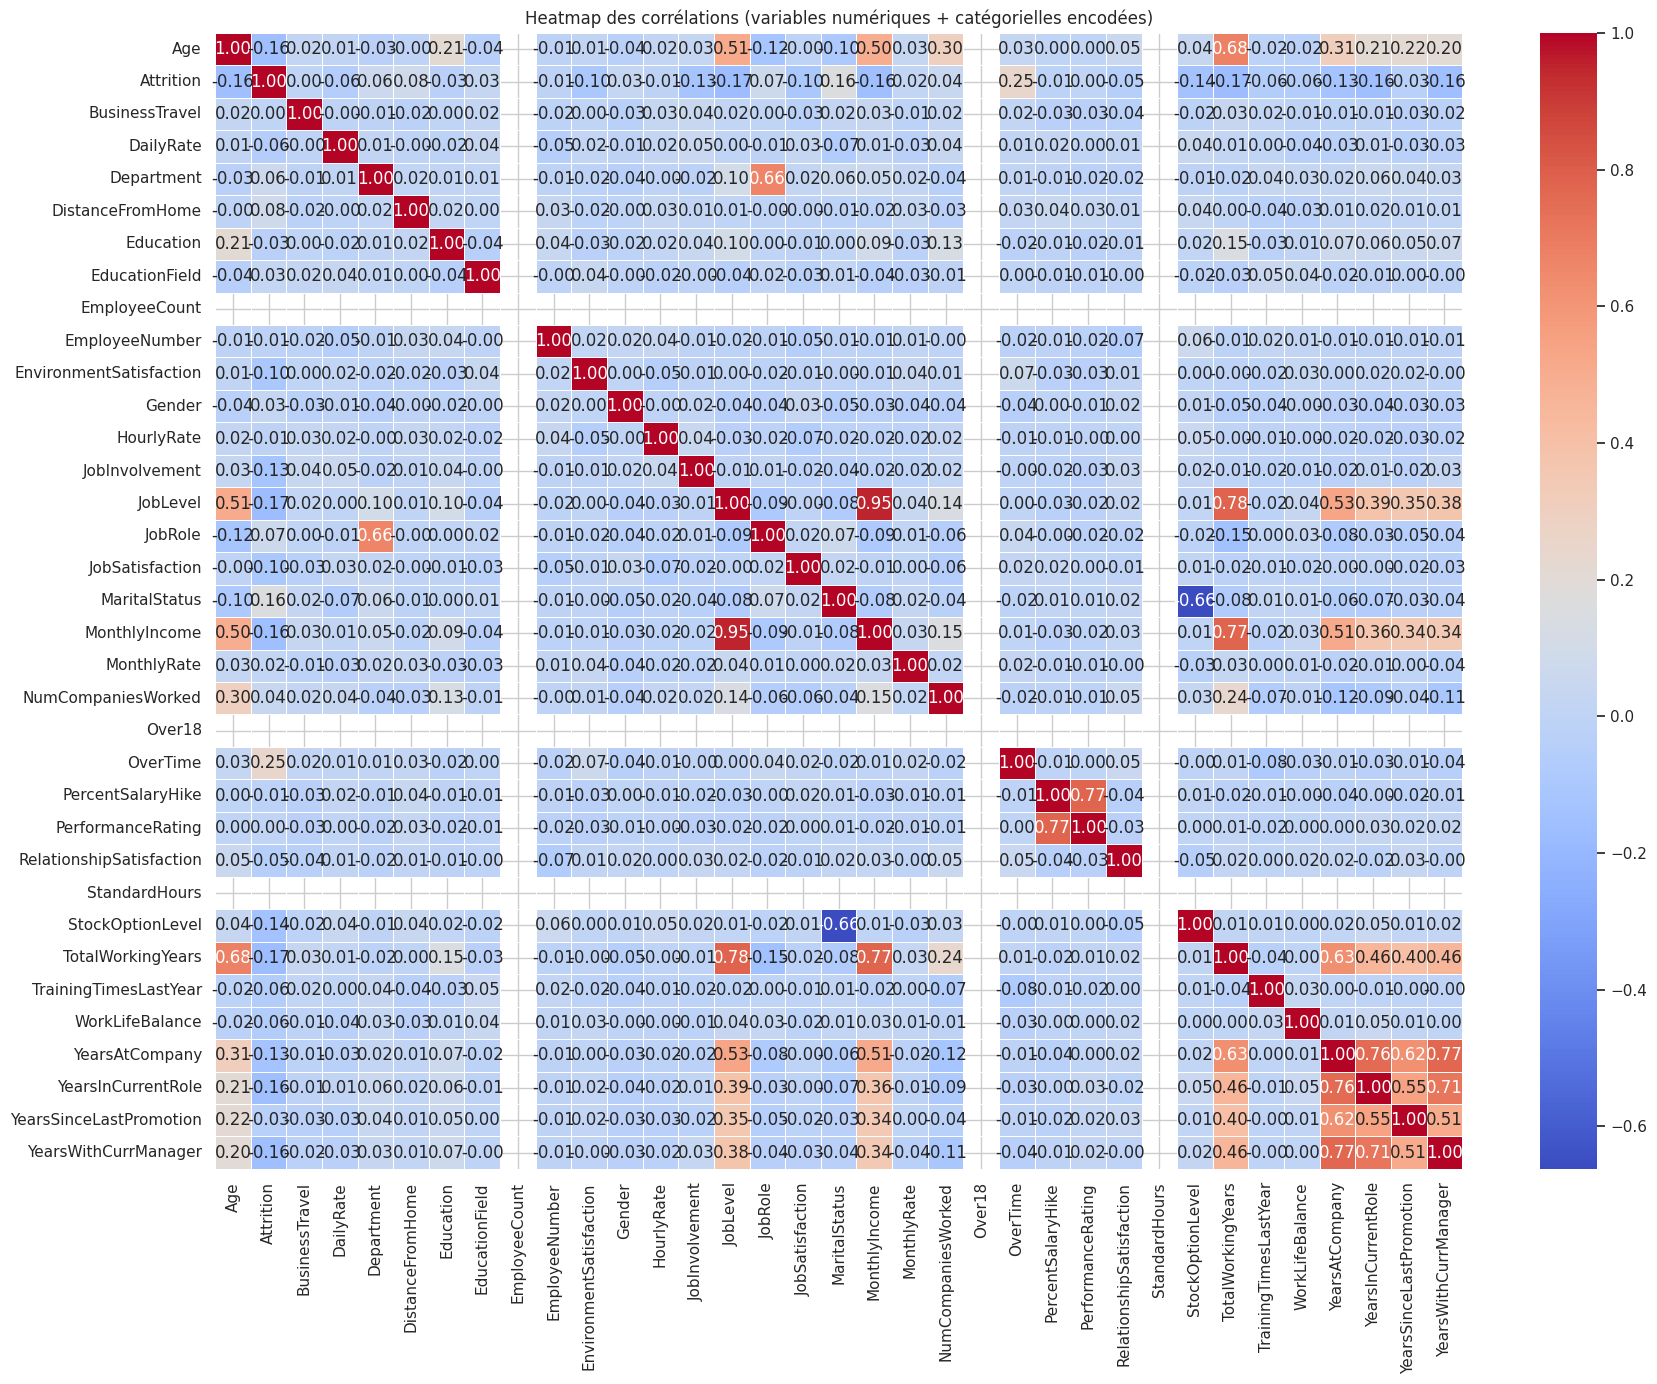

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Encodage des colonnes catégorielles
df_encoded = df.copy()
object_cols = df_encoded.select_dtypes(include='object').columns
df_encoded[object_cols] = df_encoded[object_cols].apply(lambda col: col.astype('category').cat.codes)

# Calcul de la matrice de corrélation
correlation_full = df_encoded.corr()

# Affichage de la heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_full, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap des corrélations (variables numériques + catégorielles encodées)")
plt.tight_layout()
plt.show()


###  BarPlot des corrélations entre "Attrition" et toutes les autres variables

/tmp/ipython-input-5-873192511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_corr.values, y=attrition_corr.index, palette="coolwarm")


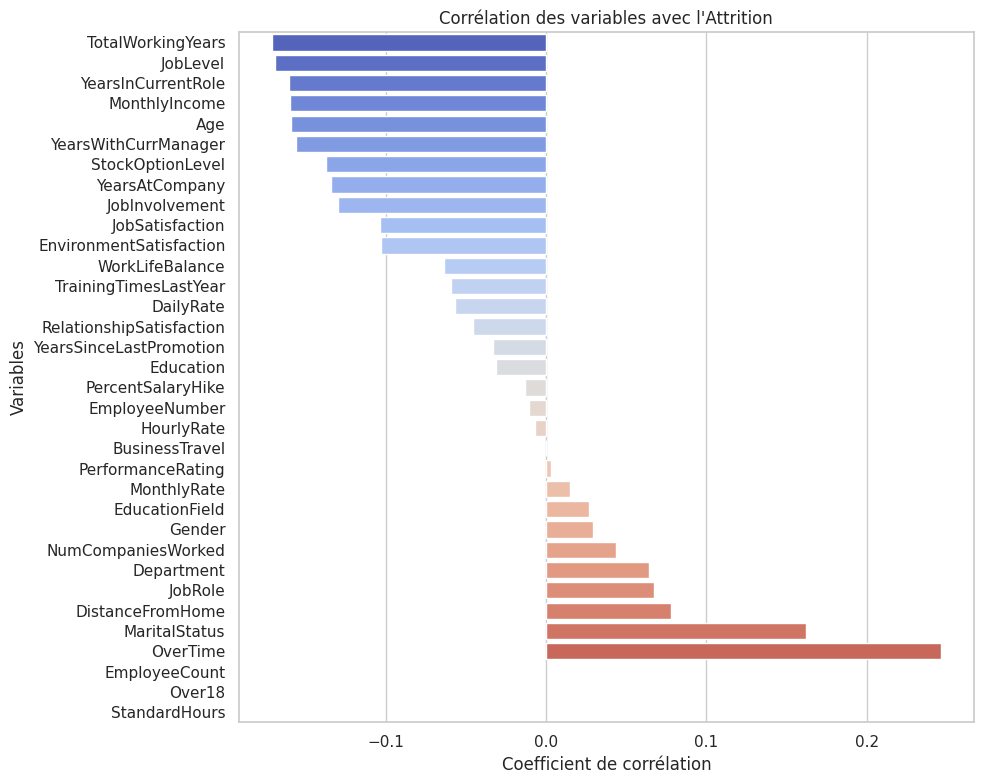

In [ ]:
# Extraire la série de corrélations avec Attrition
attrition_corr = correlation_full["Attrition"].drop("Attrition").sort_values()

# Barplot
plt.figure(figsize=(10, 8))
sns.barplot(x=attrition_corr.values, y=attrition_corr.index, palette="coolwarm")
plt.title("Corrélation des variables avec l'Attrition")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


### BarPlot du taux d'attrition par status Marital

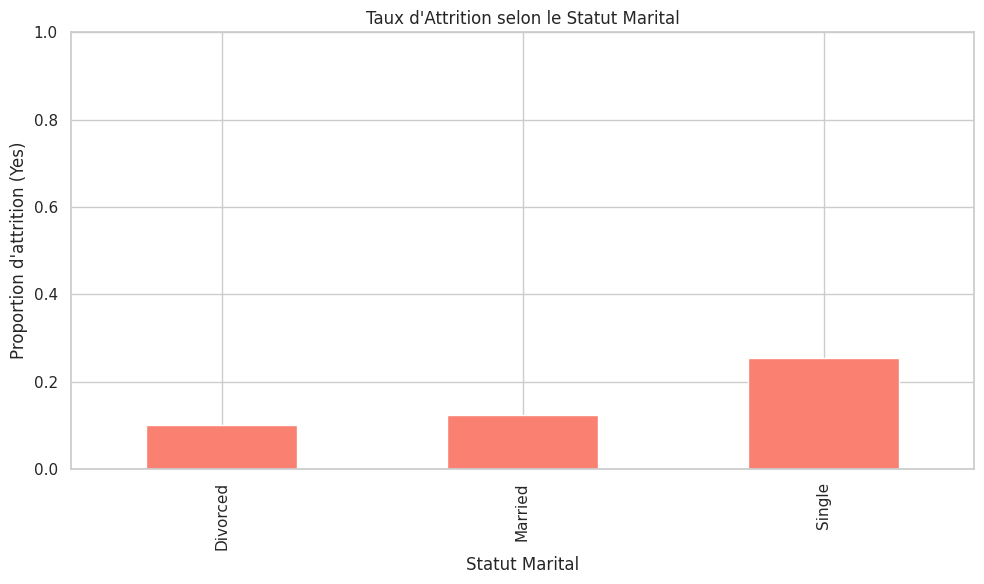

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regrouper les données par MaritalStatus et Attrition
marital_attrition = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()

# Calculer les proportions d’attrition (Yes)
marital_attrition_rate = marital_attrition.div(marital_attrition.sum(axis=1), axis=0)

# Tracer le barplot
marital_attrition_rate['Yes'].plot(kind='bar', color='salmon')
plt.title("Taux d'Attrition selon le Statut Marital")
plt.ylabel("Proportion d'attrition (Yes)")
plt.xlabel("Statut Marital")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


# Calcul du pourcentage d'attrition ("Yes") par statut marital
attrition_by_marital_status = df.groupby("MaritalStatus")["Attrition"].value_counts(normalize=True).unstack()

# Extraire les pourcentages de "Yes" et les convertir en pourcentage
attrition_percentage = (attrition_by_marital_status["Yes"] * 100).sort_values(ascending=False)

# Affichage formaté
for status, percentage in attrition_percentage.round(2).items():
    print(f"{status} : {percentage}% d'attrition")


Single : 25.53% d'attrition
Married : 12.48% d'attrition
Divorced : 10.09% d'attrition


###  Attrition Selon Les Heures Supplémentaires effectuées

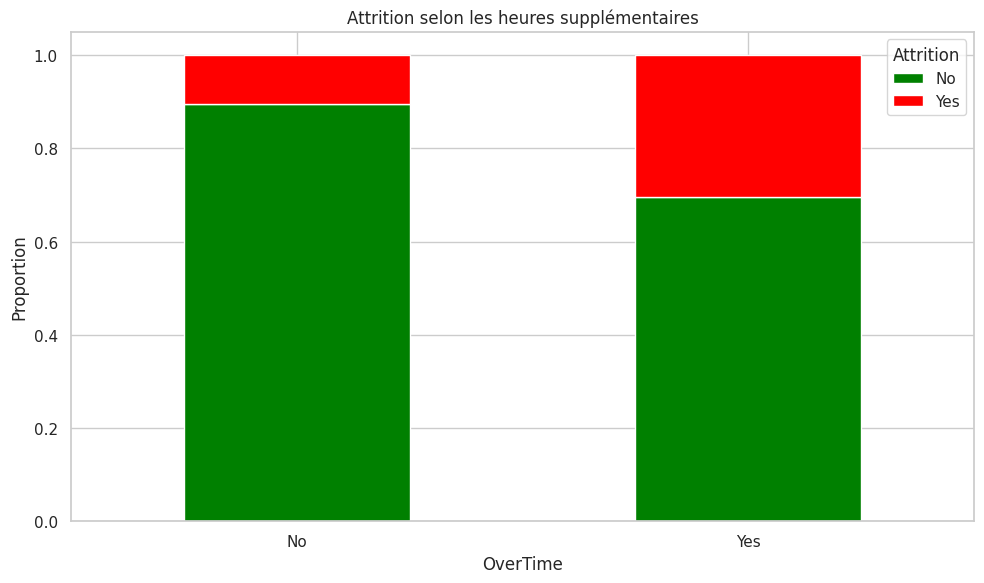

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Taux d'attrition par statut d’heures sup
overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()

# Barplot
overtime_attrition.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title("Attrition selon les heures supplémentaires")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


### Distance moyenne Domicile-Travail par Poste et Attrition

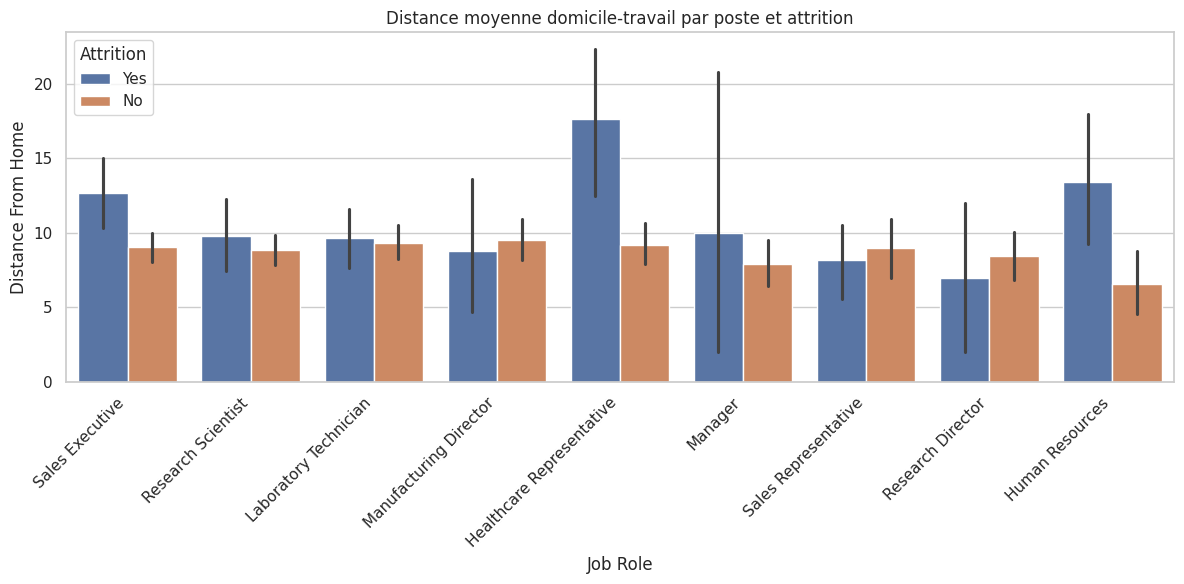

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='JobRole', y='DistanceFromHome', hue='Attrition', estimator=np.mean)
plt.title("Distance moyenne domicile-travail par poste et attrition")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Distance From Home")
plt.xlabel("Job Role")
plt.tight_layout()
plt.show()


### Attrition selon le nombre d'entreprises précédentes

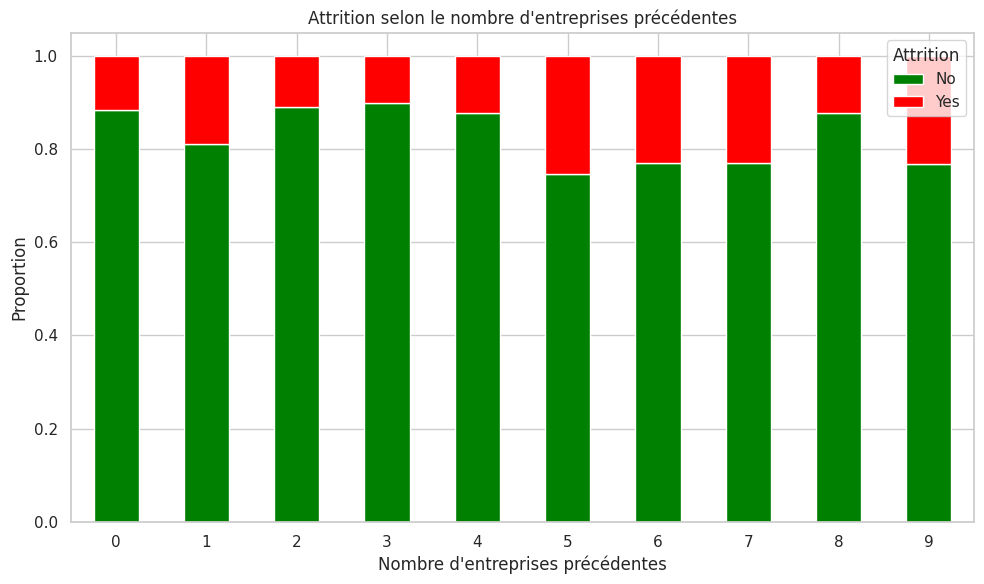

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcul des proportions d'attrition selon le nombre d'entreprises précédentes
attrition_by_company = df.groupby('NumCompaniesWorked')['Attrition'].value_counts(normalize=True).unstack()

# Création du barplot empilé
attrition_by_company.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title("Attrition selon le nombre d'entreprises précédentes")
plt.xlabel("Nombre d'entreprises précédentes")
plt.ylabel("Proportion")
plt.legend(title="Attrition", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


| Nombre d'entreprises précédentes | Tendance observée                                                                                |
| -------------------------------- | ------------------------------------------------------------------------------------------------ |
| **0 à 2 entreprises**            | L’attrition est relativement **faible**. Ces employés sont généralement plus stables.            |
| **3 à 5 entreprises**            | Le taux d’attrition commence à **augmenter progressivement**.                                    |
| **6 entreprises ou plus**        | Le taux d’attrition devient **nettement plus élevé**. Ces profils changent souvent d’entreprise. |


### Visualisation des Clusters et de l'Attrition

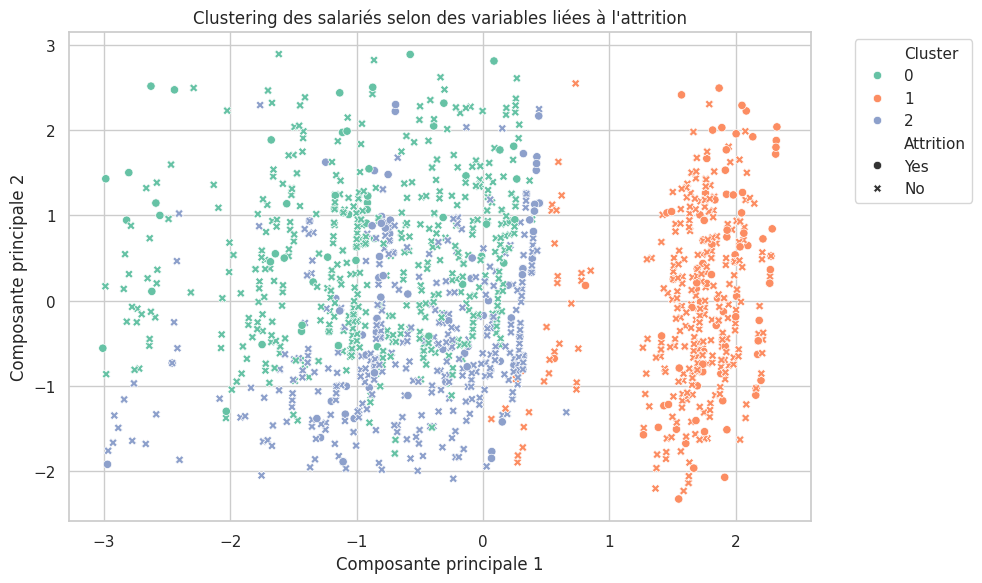


=== Profil moyen des clusters ===

        OverTime MaritalStatus  DistanceFromHome                JobRole  \
Cluster                                                                   
0             No       Married         10.432862  Laboratory Technician   
1             No       Married          9.338600        Sales Executive   
2             No        Single          7.529284     Research Scientist   

                     Department  NumCompaniesWorked Attrition  \
Cluster                                                         
0        Research & Development            2.187279        No   
1                         Sales            2.566591        No   
2        Research & Development            3.436009        No   

         Attrition Rate (%)  
Cluster                      
0                     10.78  
1                     20.77  
2                     18.22  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Sélection des variables les plus liées à l'attrition
selected_columns = [
    "OverTime", "MaritalStatus", "DistanceFromHome",
    "JobRole", "Department", "NumCompaniesWorked"
]
df_cluster = df[selected_columns].copy()

# Encodage des variables catégorielles
categorical_cols = df_cluster.select_dtypes(include='object').columns
df_cluster[categorical_cols] = df_cluster[categorical_cols].apply(lambda col: col.astype('category').cat.codes)

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Clustering avec KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# Réduction de dimension pour visualisation (PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df["PCA1"] = reduced_data[:, 0]
df["PCA2"] = reduced_data[:, 1]

# Visualisation des clusters avec attrition
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", style="Attrition", palette="Set2")
plt.title("Clustering des salariés selon des variables liées à l'attrition")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyse du profil moyen de chaque cluster
cluster_profile = df.groupby("Cluster")[
    ["OverTime", "MaritalStatus", "DistanceFromHome", "JobRole",
     "Department", "NumCompaniesWorked", "Attrition"]
].agg(lambda x: x.value_counts().index[0] if x.dtype == 'object' else x.mean())

# Taux d’attrition par cluster
attrition_rate_by_cluster = df.groupby("Cluster")["Attrition"].value_counts(normalize=True).unstack()["Yes"] * 100
cluster_profile["Attrition Rate (%)"] = attrition_rate_by_cluster.round(2)

# Affichage du profil des clusters
print("\n=== Profil moyen des clusters ===\n")
print(cluster_profile)
